[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal170988/supervised-learning/blob/main/classification/decision-tree/decision-tree.ipynb)



# Decision tree on Mushroom Data:

Using Decision Tree, we will find the best feature in the mushroom dataset by using the purity measaures, viz., Accuracy, Gini index & Entropy.

## Import packages

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used in q 2 for plots.
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # for decision tree- classification case
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used in q 2 for plots.
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # for decision tree- classification case
import warnings
import math
from IPython.display import display


## Download dataset from google drive


In [6]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-api-python-client==2.22.0
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-auth google-auth-oauthlib google-auth-httplib2
%pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
warnings.filterwarnings("ignore")
url = 'https://drive.google.com/uc?id=1rSbD3pI0rlaz3m1pjmFsu4ycdsX4qXBb'
output = 'agaricus-lepiota.data'
gdown.download(url, output, quiet=False, verify=False)

You should consider upgrading via the '/home/nitesh/env/dev37/python37/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1rSbD3pI0rlaz3m1pjmFsu4ycdsX4qXBb
To: /home/nitesh/env/dev37/repos/supervised-learning/classification/decision-tree/agaricus-lepiota.data
100%|██████████| 374k/374k [00:00<00:00, 1.23MB/s]


'agaricus-lepiota.data'

## Load mushroom dataset

In [7]:
'Read the mushroom data'
md = pd.read_csv("agaricus-lepiota.data", header = None)


# Dataset contains 23 species of gilled mushrooms in the Agaricus and Lepiota Family
# Classes are edible represented as "e" and poisonous represented as "p" in 0th column.
# Shape of dataset is (8124 observations with 23 features(including class feature))

# Get column names from the provided file 'agaricus-lepiota.names' -
md.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
display(md)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Find the best features (take purity measure: accuracy)

Best features are the ones those have high accuracy.The feature with high accuracy value will be more pure comparitive to feature with lower accuracy value.

In [3]:
"Best Feature using Purity measure = Accuracy"

list_accuracy_measure = [0.00] 
for i in range(1,23):
    crosstable = pd.crosstab(md.iloc[:,i], md['class'])  # cross table between feature "class" and other feature
    # sum column will contain total observations belonging to a category for a feature.
    crosstable['sum'] = crosstable.sum(axis = 1)  
    # to which class(e or p), feature category contains shares maximum number of data points.
    crosstable['max_e_p'] = crosstable[["e", "p"]].max(axis=1) 
    crosstable['accuracy'] = crosstable['max_e_p']/crosstable['sum'] 
    wt_accuracy_measure = 0
    for i in range(crosstable.shape[0]):
        wt_accuracy_measure = wt_accuracy_measure + (crosstable['sum'][i]/md.shape[0])*crosstable['accuracy'][i]
    list_accuracy_measure.append(wt_accuracy_measure)
    
accuracy_ind = pd.DataFrame(list(zip(md.columns, list_accuracy_measure)), columns =['feature_name', 'weighted_accuracy_measure'])
accuracy_ind  = accuracy_ind.iloc[1:]


print("Accuracy Purity Measures:\n",accuracy_ind) 

accuracy_ind.loc[accuracy_ind['weighted_accuracy_measure'].idxmax()]

Accuracy Purity Measures:
                 feature_name  weighted_accuracy_measure
1                  cap-shape                   0.564254
2                cap-surface                   0.580502
3                  cap-color                   0.595273
4                    bruises                   0.743968
5                       odor                   0.985229
6            gill-attachment                   0.517971
7               gill-spacing                   0.615953
8                  gill-size                   0.756278
9                 gill-color                   0.805022
10               stalk-shape                   0.552930
11                stalk-root                   0.645987
12  stalk-surface-above-ring                   0.774495
13  stalk-surface-below-ring                   0.766125
14    stalk-color-above-ring                   0.716396
15    stalk-color-below-ring                   0.714426
16                 veil-type                   0.517971
17                vei

feature_name                     odor
weighted_accuracy_measure    0.985229
Name: 5, dtype: object

In the above table, the feature term "odor" gets the maximum accuracy value.

## Find the best features (take purity measure: gini index)

In [4]:
"Best feature using Purity measure = Gini Index"

list_gini_measure = [0.00] 
for i in range(1,len(md.columns)):
    crosstable = pd.crosstab(md.iloc[:,i], md['class'])
    crosstable['sum'] = crosstable.sum(axis = 1)
    crosstable['prob_e'] = round(crosstable['e']/crosstable['sum'],2)
    crosstable['prob_p'] = round(crosstable['p']/crosstable['sum'],2)
    crosstable['ginimeasure'] = round((crosstable['prob_e']*crosstable['prob_e'] + crosstable['prob_p']*crosstable['prob_p']),4)
    weighted_gini_measure = 0
    for i in range(crosstable.shape[0]):
        weighted_gini_measure = weighted_gini_measure + (crosstable['sum'][i]/md.shape[0])*crosstable['ginimeasure'][i]
    list_gini_measure.append(weighted_gini_measure)

giniindex = pd.DataFrame(list(zip(md.columns, list_gini_measure)), columns =['feature_name', 'weighted_gini_measure'])
giniindex  = giniindex.iloc[1:]
print("Gini Index Measures:\n",giniindex) 


# print("\n")
# print("Crosstable between 'habitat' and 'class' feature:\n",crosstable)
# print("\n")
# print("best feature as per gini index purity measure is:")
giniindex.loc[giniindex['weighted_gini_measure'].idxmax()]

Gini Index Measures:
                 feature_name  weighted_gini_measure
1                  cap-shape               0.529894
2                cap-surface               0.519603
3                  cap-color               0.523898
4                    bruises               0.627303
5                       odor               0.974726
6            gill-attachment               0.508885
7               gill-spacing               0.560332
8                  gill-size               0.649324
9                 gill-color               0.731633
10               stalk-shape               0.505469
11                stalk-root               0.583080
12  stalk-surface-above-ring               0.672021
13  stalk-surface-below-ring               0.667363
14    stalk-color-above-ring               0.638271
15    stalk-color-below-ring               0.633836
16                 veil-type               0.500800
17                veil-color               0.512504
18               ring-number              

feature_name                 odor
weighted_gini_measure    0.974726
Name: 5, dtype: object

Best feature is the one whose gini index measure is highest. Since the feature with high gini index value would be more pure comparitive to feature with lower gini index value. Feature name "odor" gets the maximum gini index value. Gini index value = 0.9747. Hence, it is the best feature to split considering the gini index as purity measure.

In best case and worst case, the gini index measure = accuracy measure. 

## Find the best features (take purity measure: entropy)

In [5]:
"Best Feature using Purity measure = Entropy"

# """
# compute entropy for feature 'class'. 
# Note that the entropy of feature 'class' would be helpful during calculations of information gain- 
# """


# value_e = md['class'].value_counts()[0] /md.shape[0] # proportion of category "e" in feature 'class'
# value_p = md['class'].value_counts()[1] /md.shape[0] # proportion of category "p" in feature 'class'

# """
# Since, log base should be the number of categories a feature can take. And the number of unique 
# categories in feature 'class' is 2. Therefore,base_class = 2 for feature 'class'. -
# """

# base_class = len(md.iloc[:,0].unique())   # len(md.iloc[:,0].unique()) = 2


# """
# Use log function of  math class for log computations below-

# """

# entropy_class = -value_e*math.log(value_e, base_class) - value_p*math.log(value_p, base_class)
# entropy_class

"""
Information gain by splitting on feature & Purity Table with Accuracy, Gini Index and 1-entropy
"""

list_infogain_features = [0.00] 

for j in range(1, len(md.columns)):  # iterate over all columns/features.
    wt_entropy = 0
    entropy_cls_feature= 0
    # i refers to categories within a feature i.e. iteration over all categories of a feature.
    for i in range(len(md.iloc[:,j].unique())):
        test = md[md.iloc[:,j] == md.iloc[:,j].unique()[i]]  # subset feature's category data.
        # choose log base as k which is number of categories the feature can take.
        logbase = len(md.iloc[:,j].unique())
        # since for feature 'veil_type', we observe only one unique category and hence logbase =1.
        #Dividing with log1 gives 'Zero Division Error'. Use ifelse to treat 'Zero Division Error' error.
        if logbase == 1:  
            logbase = 2
        else:
            logbase = logbase

        if len(test['class'].unique()) > 1:
            val_e_featurecatg = test['class'].value_counts()[0]/test.shape[0]
            val_p_featurecatg = test['class'].value_counts()[1]/test.shape[0]
            entropy_feature = -(val_e_featurecatg)*math.log(val_e_featurecatg,logbase)- val_p_featurecatg*math.log(val_p_featurecatg,logbase)
            entropy_cls_feature += entropy_feature
            wt_entropy += (test.shape[0]/md.shape[0])*entropy_feature
        else:
            entropy_feature = 0
            entropy_cls_feature += entropy_feature
            wt_entropy += (test.shape[0]/md.shape[0])*entropy_feature
            # since entropy  = 0 for pure category. All datapoints in a category belongs to same class label(either p or e).

    infogain_feature = 1 - wt_entropy  # info gain = 1- wt.entropy
    list_infogain_features.append(infogain_feature)

infogain = pd.DataFrame(list(zip(md.columns, list_infogain_features)), columns =['feature_name', 'infogain_feature'])
infogain  = infogain.iloc[1:]
print("Infogain Measures of features:\n",infogain)
print("\n")
print("best feature as per infogain measure is:")
print(infogain.loc[infogain['infogain_feature'].idxmax()])


Infogain Measures of features:
                 feature_name  infogain_feature
1                  cap-shape          0.632385
2                cap-surface          0.514761
3                  cap-color          0.710103
4                    bruises          0.193312
5                       odor          0.970664
6            gill-attachment          0.015097
7               gill-spacing          0.101815
8                  gill-size          0.231086
9                 gill-color          0.837630
10               stalk-shape          0.008449
11                stalk-root          0.627788
12  stalk-surface-above-ring          0.642829
13  stalk-surface-below-ring          0.636413
14    stalk-color-above-ring          0.764908
15    stalk-color-below-ring          0.760987
16                 veil-type          0.000932
17                veil-color          0.512375
18               ring-number          0.393919
19                 ring-type          0.706689
20         spore-print-color

## Create purity table from the calculated purity measures
<br>
Best feature is the one whose information gain is highest and that is 'odor' with an information gain = 97.06%

In [6]:
purity_table = pd.DataFrame(list(zip(md.columns, list_infogain_features, list_gini_measure, list_accuracy_measure)), columns =['feature_name', 'infogain', 'gini_index', 'accuracy'])
print("\n")
print("Purity Table:\n", purity_table)



Purity Table:
                 feature_name  infogain  gini_index  accuracy
0                      class  0.000000    0.000000  0.000000
1                  cap-shape  0.632385    0.529894  0.564254
2                cap-surface  0.514761    0.519603  0.580502
3                  cap-color  0.710103    0.523898  0.595273
4                    bruises  0.193312    0.627303  0.743968
5                       odor  0.970664    0.974726  0.985229
6            gill-attachment  0.015097    0.508885  0.517971
7               gill-spacing  0.101815    0.560332  0.615953
8                  gill-size  0.231086    0.649324  0.756278
9                 gill-color  0.837630    0.731633  0.805022
10               stalk-shape  0.008449    0.505469  0.552930
11                stalk-root  0.627788    0.583080  0.645987
12  stalk-surface-above-ring  0.642829    0.672021  0.774495
13  stalk-surface-below-ring  0.636413    0.667363  0.766125
14    stalk-color-above-ring  0.764908    0.638271  0.716396
15    s

## Accuracy vs Information gain scatter plot

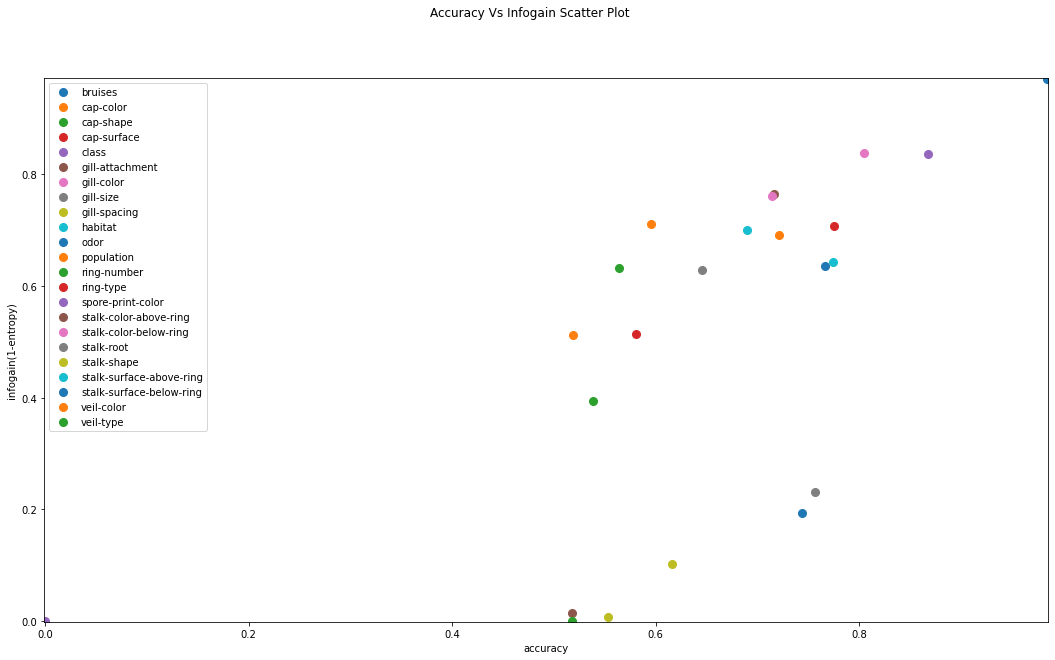

In [7]:
grpbylabel = purity_table.groupby('feature_name')
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('Accuracy Vs Infogain Scatter Plot')
plt.xlabel('accuracy')
plt.ylabel('infogain(1-entropy)')
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling
for name, group in grpbylabel:
    ax.plot(group.accuracy, group.infogain, marker='o', linestyle='', ms=8, label=name)
ax.legend()

plt.show()

It is apparent that there is a somewhat linear relationship between accuracy and info gain.